In [1]:
import pandas as pd
import numpy as np
import folium
import numpy as np
from sklearn.cluster import KMeans

### Reading the dataset

In [2]:
df=pd.read_csv('/Users/inema/Desktop/delete/Air Quality Index.csv')

In [3]:
df.head()

,PM2.5 Avg,PM10 Avg,NO2 Avg,NH3 Avg,SO2 Avg,CO Avg,Ozone Avg,City
0,57,64,20.0,3.0,14.0,29,24,"Secretariat, Amravati - APPCB"
1,52,61,14.0,5.0,6.0,48,33,"Anand Kala Kshetram, Rajamahendravaram - APPCB"
2,72,78,50.0,3.0,8.0,23,58,"Tirumala, Tirupati - APPCB"
3,100,111,53.0,2.0,29.0,45,17,"GVM Corporation, Visakhapatnam - APPCB"
4,220,149,79.0,6.0,35.0,38,25,"Alipur, Delhi - DPCC"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 8 columns):
PM2.5 Avg    92 non-null int64
PM10 Avg     92 non-null int64
NO2 Avg      91 non-null float64
NH3 Avg      90 non-null float64
SO2 Avg      90 non-null float64
CO Avg       92 non-null int64
Ozone Avg    92 non-null int64
City         92 non-null object
dtypes: float64(3), int64(4), object(1)
memory usage: 5.8+ KB


In [5]:
df.dropna()

,PM2.5 Avg,PM10 Avg,NO2 Avg,NH3 Avg,SO2 Avg,CO Avg,Ozone Avg,City
0,57,64,20.0,3.0,14.0,29,24,"Secretariat, Amravati - APPCB"
1,52,61,14.0,5.0,6.0,48,33,"Anand Kala Kshetram, Rajamahendravaram - APPCB"
2,72,78,50.0,3.0,8.0,23,58,"Tirumala, Tirupati - APPCB"
3,100,111,53.0,2.0,29.0,45,17,"GVM Corporation, Visakhapatnam - APPCB"
4,220,149,79.0,6.0,35.0,38,25,"Alipur, Delhi - DPCC"
5,202,161,45.0,7.0,46.0,75,7,"GIDC, Ankleshwar - GPCB"
6,151,125,81.0,4.0,5.0,46,22,"Sector-10, Gandhinagar - GPCB"
7,252,169,52.0,13.0,30.0,64,9,"Phase-1 GIDC, Vapi - GPCB"
8,223,188,128.0,4.0,38.0,58,30,"Phase-4 GIDC, Vatva - GPCB"
9,78,108,33.0,60.0,38.0,10,12,"Patti Mehar, Ambala - HSPCB"


##### Correlation between column

In [6]:
df.corr(method ='kendall') 

,PM2.5 Avg,PM10 Avg,NO2 Avg,NH3 Avg,SO2 Avg,CO Avg,Ozone Avg
PM2.5 Avg,1.000000,0.717425,0.366615,0.203218,0.209190,0.254922,-0.135834
PM10 Avg,0.717425,1.000000,0.418526,0.157793,0.250552,0.268296,-0.135641
NO2 Avg,0.366615,0.418526,1.000000,0.058090,0.173759,0.243408,0.054537
NH3 Avg,0.203218,0.157793,0.058090,1.000000,0.183252,0.141154,-0.118949
SO2 Avg,0.209190,0.250552,0.173759,0.183252,1.000000,0.147394,-0.100549
CO Avg,0.254922,0.268296,0.243408,0.141154,0.147394,1.000000,-0.164277
Ozone Avg,-0.135834,-0.135641,0.054537,-0.118949,-0.100549,-0.164277,1.000000


### Bar graph are created to understand the value ranges of each pollutants.

In [7]:
df.plot.bar( y='PM2.5 Avg')

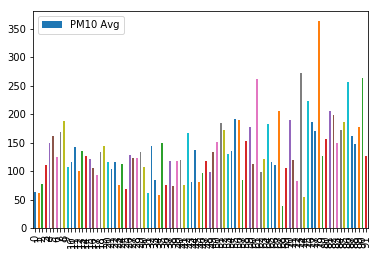

In [8]:
df.plot.bar( y='PM10 Avg')

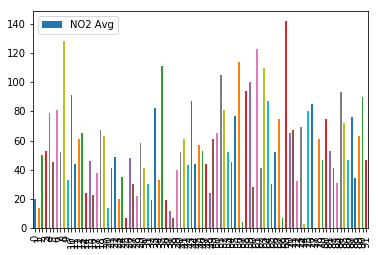

In [9]:
df.plot.bar( y='NO2 Avg')

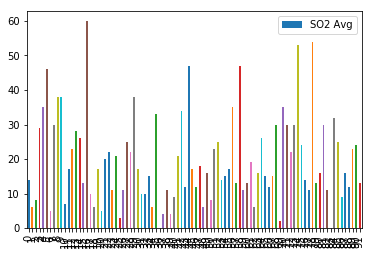

In [10]:
df.plot.bar( y='SO2 Avg')

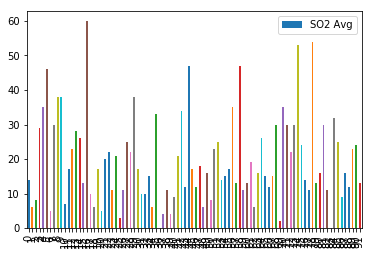

In [11]:
df.plot.bar( y='SO2 Avg')

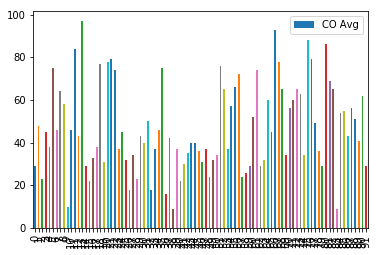

In [12]:
df.plot.bar( y='CO Avg')

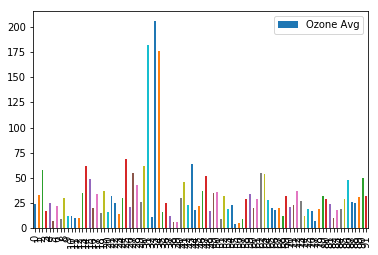

In [13]:
df.plot.bar( y='Ozone Avg')

### Station Id was the address of station from which the values where calculated. Thus for working on the dataset the need was to convert the station id to city names.
Dataset with city names is loaded in dataframe.

In [14]:
city=pd.read_csv('/Users/inema/Desktop/delete/City.csv')
city.head()

,City
0,1 SGM
1,3 STR
2,A.Thirumuruganpoondi
3,A.Vellalapatti
4,Aadityana


In [15]:
df["City_strip"]= 'na'
for drow_index, drow in df.iterrows():
    for row_index, row in city.iterrows():
        if(row.City in str(drow.City)):
            df.loc[drow_index,['City_strip']]=row.City
        

In [16]:
df=df.dropna()

### Calculating average by grouping on City name 

In [42]:
df=df.groupby('City_strip', as_index=False).agg(np.mean)


### Fetching Latitude and Longitude of Indian Cities

In [43]:
from geopy.geocoders import Nominatim

In [44]:
df["Latitude"]= 'na'
df["Longitude"]= 'na'
print("Lets find lon and lat....")
for drow_index, drow in df.iterrows():
    geolocator = Nominatim(user_agent='myapplication')
    try:
        location = geolocator.geocode(drow.City_strip)
        df.loc[drow_index,['Latitude']]=location.raw['lat']
        df.loc[drow_index,['Longitude']]=location.raw['lon']
    except:
        df=df.drop([drow_index])
        print("Error encountered in %s" %(str(drow.City_strip)))
print("Captured lon and lat")

Lets find lon and lat....
Captured lon and lat


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 58
Data columns (total 11 columns):
City_strip    59 non-null object
PM2.5 Avg     59 non-null float64
PM10 Avg      59 non-null float64
NO2 Avg       59 non-null float64
NH3 Avg       59 non-null float64
SO2 Avg       59 non-null float64
CO Avg        59 non-null float64
Ozone Avg     59 non-null float64
Cluster       59 non-null float64
Latitude      59 non-null object
Longitude     59 non-null object
dtypes: float64(8), object(3)
memory usage: 8.0+ KB


In [46]:
df=df.dropna()
df.head()

,City_strip,PM2.5 Avg,PM10 Avg,NO2 Avg,NH3 Avg,SO2 Avg,CO Avg,Ozone Avg,Cluster,Latitude,Longitude
0,Ajmer,108.0,120.0,52.0,9.0,9.0,22.0,30.0,5.0,26.4691,74.639
1,Alwar,54.0,75.0,61.0,6.0,21.0,30.0,46.0,0.0,27.5,76.5
2,Ambala,78.0,108.0,33.0,60.0,38.0,10.0,12.0,0.0,30.3843674,76.770421
3,Amravati,57.0,64.0,20.0,3.0,14.0,29.0,24.0,0.0,20.9316219,77.7588455
4,Ankleshwar,202.0,161.0,45.0,7.0,46.0,75.0,7.0,2.0,21.6293206,72.9945103


### K means cluster algorithm is applied.

In [47]:
data= df[['PM2.5 Avg', 'PM10 Avg', 'NO2 Avg',
       'NH3 Avg', 'SO2 Avg', 'CO Avg',
       'Ozone Avg']]
df['Cluster']='na'
data=data.dropna()
kmeans = KMeans(n_clusters=6, random_state=0).fit(data)
clusters = kmeans.labels_
df['Cluster']=clusters

### Folium is used to visualize clusters in India Map

In [37]:
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=4)
X = df['Latitude']
Y = df['Longitude']

colors = ['red', 'orange','violet','green', 'blue', 'yellow']


for latitude, longitude, cluster in zip(df['Latitude'], df['Longitude'],df['Cluster']):
    label = folium.Popup(cluster, parse_html=True)
    folium.CircleMarker(
        [float(latitude), float(longitude)],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(india_map)  

india_map

In [62]:
#Saving results
india_map.save('india_aqi.html')

### Grouping the cities based on clusters in dataframe

In [49]:
dataset=df.groupby('Cluster', as_index=False).agg(lambda x: ', '.join(set(x.dropna())))

In [58]:
dataset=dataset[['Cluster','City_strip']]

In [59]:
dataset

,Cluster,City_strip
0,0,"Delhi, Vapi , Noida, Vatva, Varanasi, Ghaziabad"
1,1,"Alwar, Rajamahendravaram, Khanna, Tirupati, Th..."
2,2,"Ankleshwar, Hapur, Baghpat, Bhiwadi, Bulandsha..."
3,3,"Aurangabad, Nagpur, Nashik"
4,4,"Udaipur, Visakhapatnam, Hubballi, Pali, Ajmer,..."
5,5,"Yamuna Nagar, Siliguri, Jind, Jodhpur, Palwal,..."
